# intuition and theory:

* it is about assinging the data point a class based on its features and based on data of similar data points.

* it measures how close the data point is to its neighbors and assign the point the class of the closest neighbors. i.e suppose we have a basket of unknown fruits but we can measure their size and observe their color then each fruit can be classified based on how close it is to the other fruit's resemblance. 


# ideal k value:

* choosing k value is like choosing the number of neighbors. the more # of neighbors present around the point, the more likely the point belongs to the class. but sometimes though (rarely) the point may be at the intersection of the two or three classes, lying right at the middle of many classes at once, in which case it is imperative to consider which neighbor 'came first', which neighbors majorly are lying close to the point, etc. to choose the ideal k point such that the point belongs to only to one class not many classes at once. we can use the error metric as our useful guide. 

* Error = 1 - Accuracy. what this equation tells is that if there is more error the accuracy will be low. if there is more accuracy the error will be low. 

* k value that gives the lowest error is the ideal one. 

* there are two methods to find the ideal k and lowest error. 

* 1) Elbow method: 

* 2) cross validate a grid search of multiple k values and choose the one with the lowest error or highest Accuracy. 

# day 70

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


# to see the relationship between 'Gene One' and 'Gene Two'

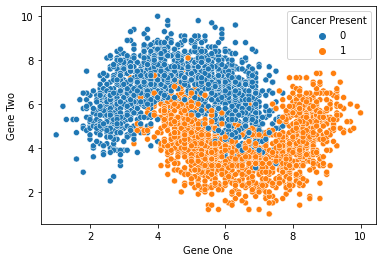

In [16]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

plt.show()

## trying to see where the points overlap to distinguish the points as two seperate classes one: cancer, two: no cancer.

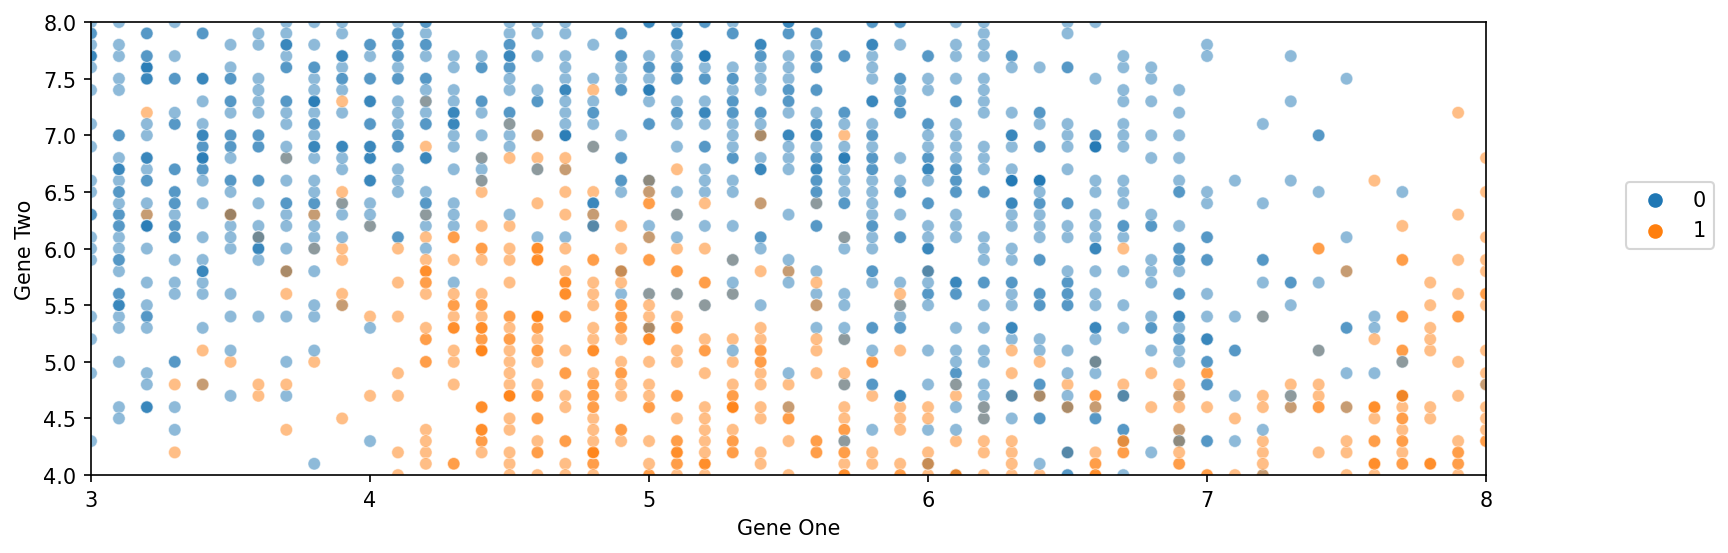

In [25]:
plt.figure(dpi=150,figsize=(12,4))

sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present',alpha=0.5)


plt.xlim(3,8)
plt.ylim(4,8)

plt.legend(loc=(1.1,0.5))
plt.show()

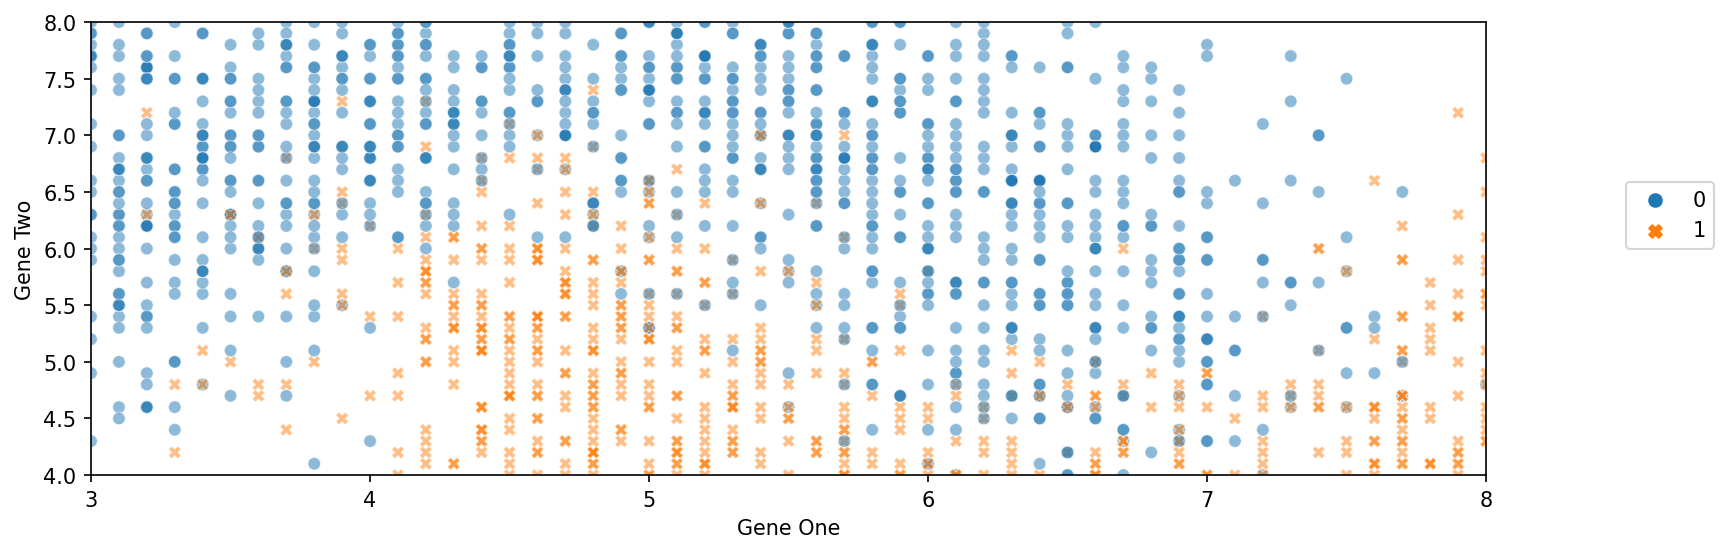

In [24]:
plt.figure(dpi=150,figsize=(12,4))

sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present',alpha=0.5,style='Cancer Present')


plt.xlim(3,8)
plt.ylim(4,8)

plt.legend(loc=(1.1,0.5))
plt.show()

# relationship between cancer presence and Gene type

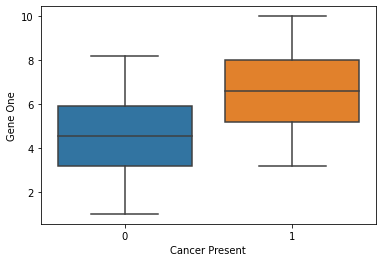

In [13]:
sns.boxplot(data=df, x='Cancer Present',y='Gene One')

plt.show()

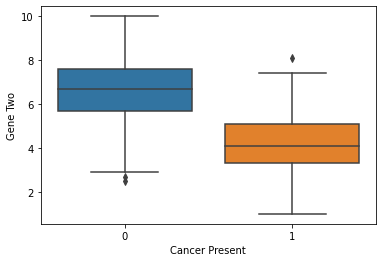

In [14]:
sns.boxplot(data=df, x='Cancer Present',y='Gene Two')

plt.show()

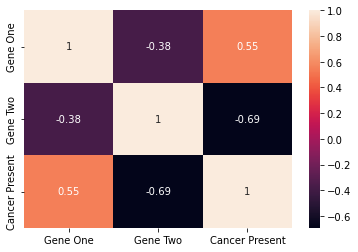

In [15]:
sns.heatmap(data=df.corr(),annot=True)

plt.show()

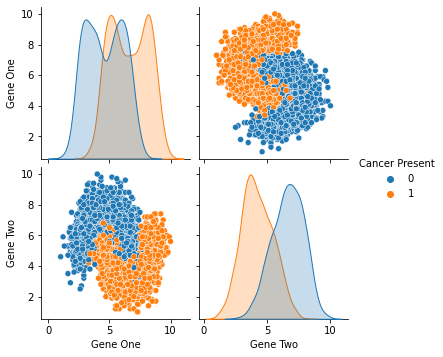

In [27]:
sns.pairplot(data=df,hue='Cancer Present')

# Model Building

# day 71 & day 72

In [1]:
import numpy as np
import sympy as sym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
x = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

# train_test_splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)


# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors means how many neighbors need to be present close to the target point to classify the target point into that 
# class
knn_model = KNeighborsClassifier(n_neighbors=1) 

knn_model.fit(scaled_x_train,y_train)

actual = y_test
prediction = knn_model.predict(scaled_x_test)

# error metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



In [19]:
accuracy_score(actual,prediction)

0.9011111111111111

In [16]:
confusion_matrix(actual,prediction)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [13]:
len(actual)

900

In [17]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [20]:
# error = 1-accuracy

error = 1 - accuracy_score(actual,prediction)
error

0.09888888888888892

# choosing the ideal k


* there are two ways to choose the ideal k

* 1) elbow method
* 2) typical grid search

## elbow method

In [4]:
test_error_rates = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(1,30):
    # importing the essentials
    
    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    
    actual = y_test
    prediction = knn_model.predict(scaled_x_test)
    error = 1 - accuracy_score(actual,prediction)
    
    test_error_rates.append(error)

    


In [5]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

### k at x axis and test_error_rates at y axis plotting 

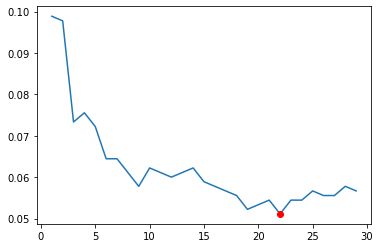

22

In [6]:
k_points = np.linspace(1,k,k)


# plotting the k points and test_error_rates
plt.plot(k_points,test_error_rates)


# plotting the lowest value in the test_error rate
y_point = np.min(test_error_rates) # taking the minimum 
x_point = test_error_rates.index(np.min(test_error_rates)) + 1 # taking the index of the minimum in the list


# it counts from zeroth index but the k value starts from 1 so we add 1 to the x_point.
plt.plot(x_point,y_point,'ro')

plt.show()

x_point

# so the ideal k value is 22

## grid search

In [12]:
# setting the standard scaler
scaler = StandardScaler()

# setting the model
knn = KNeighborsClassifier()

#setting the operations to be performed inside the Pipeline
#anything that's done with the Pipeline can be done without it but just needs additional codes


# when there are more than one operations to be performed we use pipeline

operations = [('scaler',scaler),('knn',knn)]

# importing the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline(operations)

# gridsearch cv

from sklearn.model_selection import GridSearchCV

k_values = list(range(1,30))

param_grid = {'knn__n_neighbors':k_values}

grid_model = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

grid_model.fit(x_train,y_train)

prediction = grid_model.predict(x_test)
actual = y_test







In [11]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(actual,prediction)

0.9466666666666667

In [15]:
confusion_matrix(actual,prediction)

array([[451,  19],
       [ 29, 401]], dtype=int64)

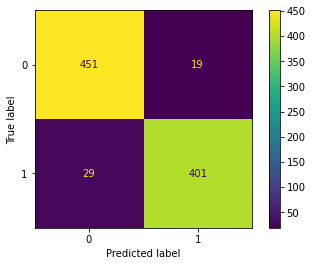

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_model,x_test,y_test)

plt.show()

In [20]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



# conclusion:

* if n_neighbors = 0, then the object has no neighbor, it is an object found in a space so abruptly with no identifiable neighbors nearby, then the object needs to be classified into a group of objects with similarity or similar abrupt appearance or put  them into mystery label. zero is a mystery here. 

# making predictions with new_data

In [21]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# predicting whether they get cancer or not with specific gene combination

In [34]:
new_patient = [[2.2,6.4]] # gene1: 2.2, gene2: 6.4

grid_model.predict(new_patient)



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# predicting the probability of getting the cancer

In [28]:
grid_model.predict_proba(new_patient)

# we can be 100% sure that this person with this specific gene combination won't have the cancer. 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])